# model comparison

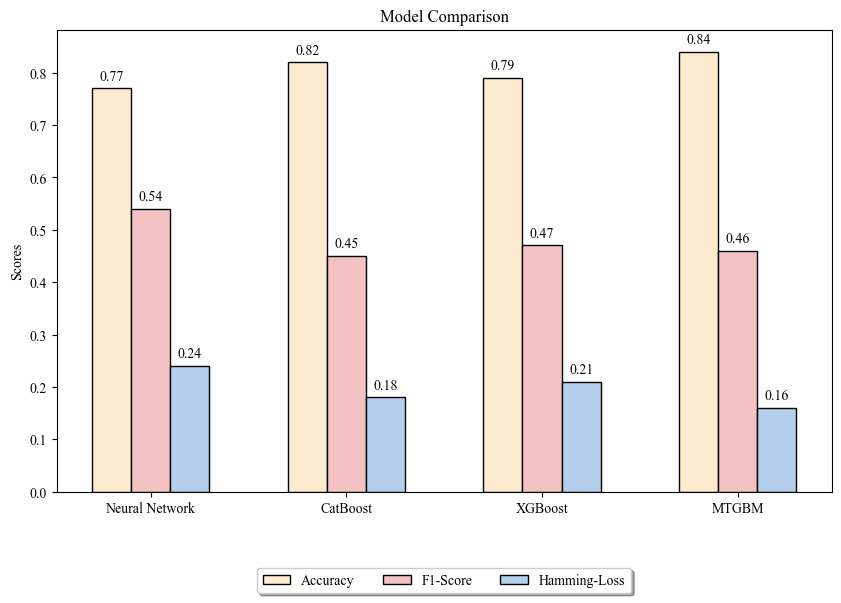

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

models = ['Neural Network', 'CatBoost', 'XGBoost', 'MTGBM']
metrics = ['Accuracy', 'F1-Score', 'Hamming-Loss']
data = {
    'Neural Network': [0.77, 0.54, 0.24],
    'CatBoost': [0.82, 0.45, 0.18],
    'XGBoost': [0.79, 0.47, 0.21],
    'MTGBM': [0.84, 0.46, 0.16]
}

soft_colors = ['#FDEBCF', '#F4C2C2', '#B4CFEC']  

fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(models))  
width = 0.2  

for i, metric in enumerate(metrics):
    values = [data[model][i] for model in models]
    bars = ax.bar(x + i * width, values, width, label=metric, color=soft_colors[i], edgecolor='black')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=3)

ax.grid(False)

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# 设置标签和标题
ax.set_ylabel('Scores')
ax.set_title('Model Comparison')
ax.set_xticks(x + width)
ax.set_xticklabels(models)
plt.savefig("model comparison.png", dpi=2000)
plt.show()


# data distribution

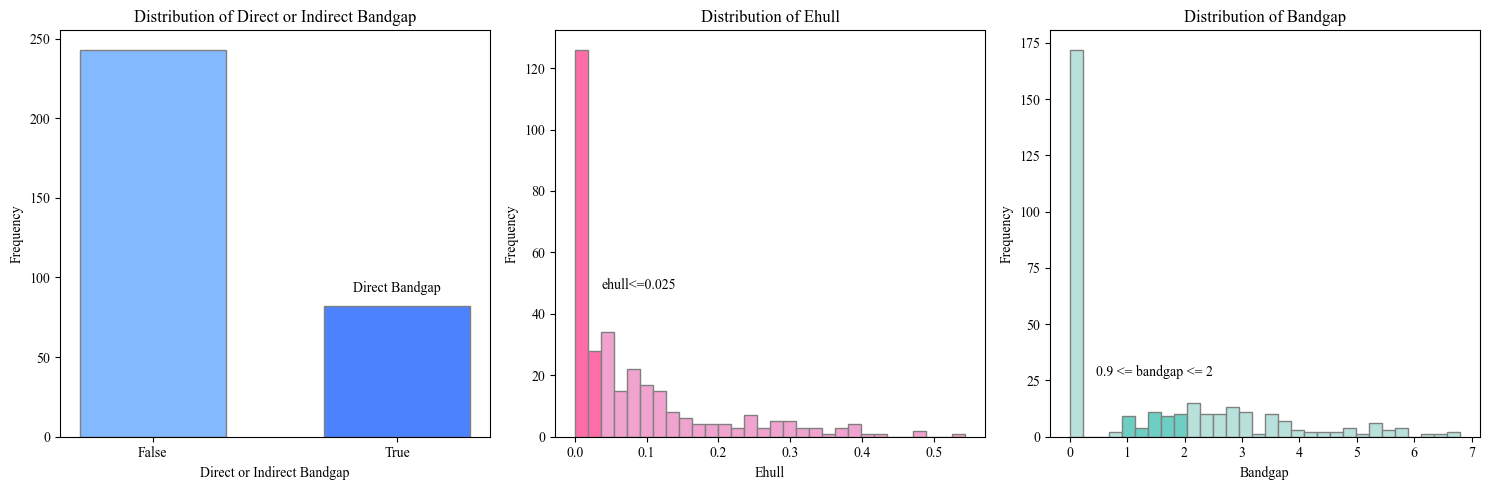

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./multi_object.csv')

colors = ['#83b9ff', '#f0a3ce', '#b9e1dc'] 
saturated_colors = ['#4d82ff', '#ff6da8', '#6dcfc3'] 

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

y_gapd_counts = df['y_gapd'].value_counts()
bar_colors = [saturated_colors[0] if x else colors[0] for x in y_gapd_counts.index]
bars = axes[0].bar(y_gapd_counts.index.map(str), y_gapd_counts.values, color=bar_colors, width=0.6, edgecolor='grey')
axes[0].set_title('Distribution of Direct or Indirect Bandgap')
axes[0].set_xlabel('Direct or Indirect Bandgap')
axes[0].set_ylabel('Frequency')
if True in y_gapd_counts.index:
    axes[0].annotate('Direct Bandgap', (1, y_gapd_counts[True]), textcoords="offset points", xytext=(0,10), ha='center')

bins_eh = 30
counts, bins, _ = axes[1].hist(df['y_eh'], bins=bins_eh, color=colors[1], edgecolor='grey')
axes[1].set_title('Distribution of Ehull')
axes[1].set_xlabel('Ehull')
axes[1].set_ylabel('Frequency')
for i, b in enumerate(bins[:-1]):
    if b <= 0.025:
        axes[1].patches[i].set_facecolor(saturated_colors[1])
right_most_bin_edge = max(b for b in bins[:-1] if b <= 0.025)
right_most_bin_count = counts[bins[:-1].tolist().index(right_most_bin_edge)]
max_y = max(counts)
annotation_height = min(right_most_bin_count, max_y)+20  # 保证不超过y轴
axes[1].annotate('ehull<=0.025', (right_most_bin_edge + 0.01, annotation_height), textcoords="offset points", xytext=(5,0), ha='left')

bins_eg = 30
counts, bins, _ = axes[2].hist(df['y_eg'], bins=bins_eg, color=colors[2], edgecolor='grey')
axes[2].set_title('Distribution of Bandgap')
axes[2].set_xlabel('Bandgap')
axes[2].set_ylabel('Frequency')
for i, (start, end) in enumerate(zip(bins[:-1], bins[1:])):
    if 0.9 <= start <= 2:
        axes[2].patches[i].set_facecolor(saturated_colors[2])
center_position_eg = sum((start + end) / 2 for start, end in zip(bins[:-1], bins[1:]) if 0.9 <= start <= 2) / sum(1 for start in bins[:-1] if 0.9 <= start <= 2)
max_count_eg = max(counts[i] for i, start in enumerate(bins[:-1]) if 0.9 <= start <= 2)
axes[2].annotate('0.9 <= bandgap <= 2', (center_position_eg, max_count_eg + 10), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.savefig("distribution.png", dpi=2000)

plt.show()


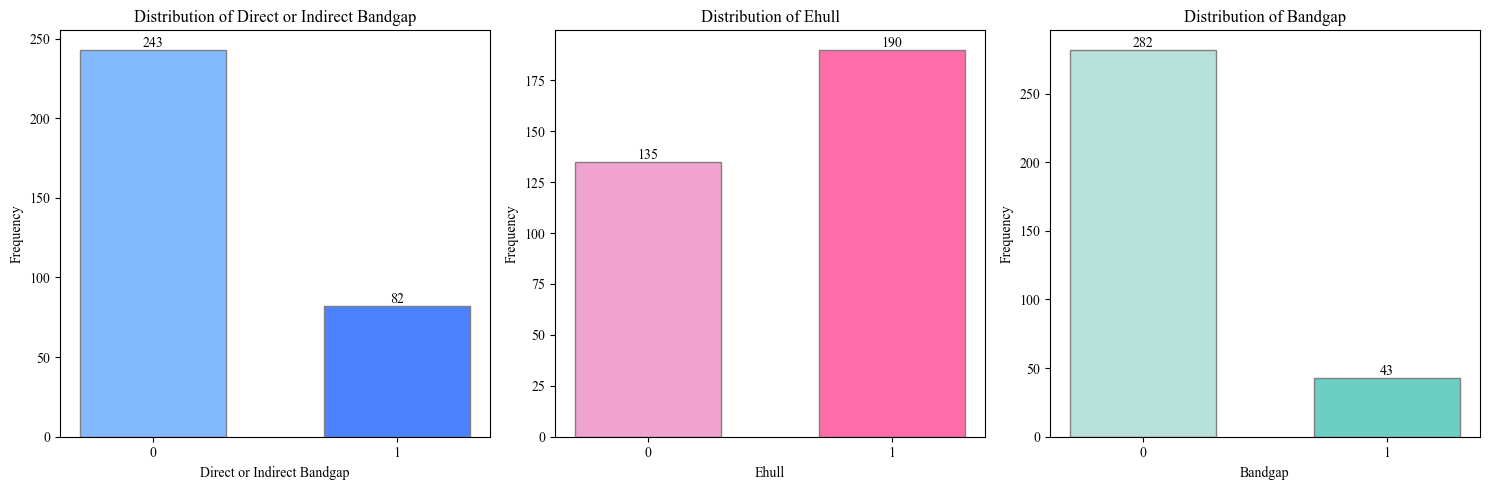

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df['is_gapd'] = df['y_gapd'].map(lambda x: 1 if x else 0)
df['y_eh'] = df['y_eh'].map(lambda x: 1 if x <= 0.025 else 0)
df['y_eg'] = df['y_eg'].map(lambda x: 1 if 0.9 <= x <= 2 else 0)

colors = ['#83b9ff', '#f0a3ce', '#b9e1dc']  # 浅蓝色，浅粉色，浅绿色
saturated_colors = ['#4d82ff', '#ff6da8', '#6dcfc3']  # 更饱和的颜色版本

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, col in enumerate(['is_gapd', 'y_eh', 'y_eg']):
    counts = df[col].value_counts().sort_index()
    bar_colors = [saturated_colors[i] if index == 1 else colors[i] for index in counts.index]
    bars = axes[i].bar(counts.index, counts.values, width=0.6, color=bar_colors, edgecolor='grey')
    
    if col == 'is_gapd':
        axes[i].set_title('Distribution of Direct or Indirect Bandgap')
        axes[i].set_xlabel('Direct or Indirect Bandgap')
    elif col == 'y_eh':
        axes[i].set_title('Distribution of Ehull')
        axes[i].set_xlabel('Ehull')
    elif col == 'y_eg':
        axes[i].set_title('Distribution of Bandgap')
        axes[i].set_xlabel('Bandgap')
    
    axes[i].set_ylabel('Frequency')
    axes[i].set_xticks([0, 1])
    
    for bar in bars:
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig("distribution transformed.png", dpi=1200)

plt.show()


# ROC for 3 targets

<Figure size 1000x800 with 0 Axes>

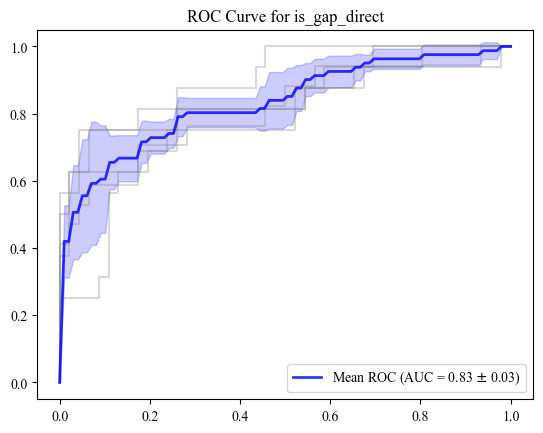

<Figure size 1000x800 with 0 Axes>

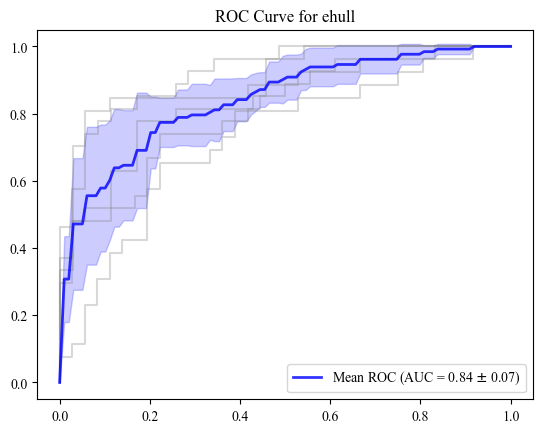

<Figure size 1000x800 with 0 Axes>

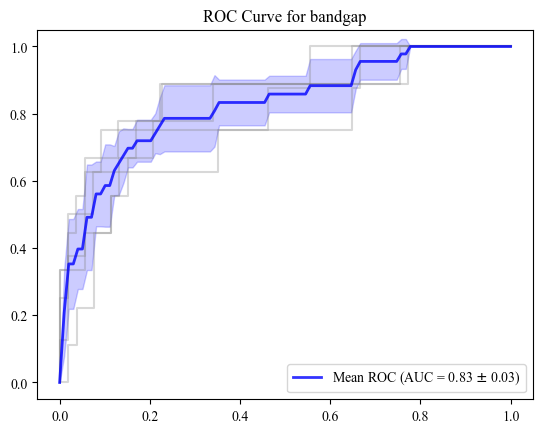

In [5]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

spinels = pd.read_csv('./spinels_ff.csv', index_col=0)
X = spinels.iloc[:, :-3]
y = spinels.iloc[:, -3:]

n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

def plot_roc_curve(X, y, target_name):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    plt.figure(figsize=(10, 8))
    plt.rc('font', family='Times New Roman')  # 设置字体为Times New Roman

    fig, ax = plt.subplots()
    for i, (train, test) in enumerate(cv.split(X, y)):
        model = lgb.LGBMClassifier()
        model.fit(X.iloc[train], y[train])
        y_score = model.predict_proba(X.iloc[test])[:, 1]
        fpr, tpr, _ = roc_curve(y[test], y_score)
        auc_score = auc(fpr, tpr)
        aucs.append(auc_score)
        ax.plot(fpr, tpr, color='grey', alpha=0.3)  # Plot each fold
        
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    std_dev_tpr = np.std(tprs, axis=0)

    ax.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)
    ax.fill_between(mean_fpr, mean_tpr - std_dev_tpr, mean_tpr + std_dev_tpr, color='blue', alpha=0.2)  # 填充置信区间阴影

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05], title=f"ROC Curve for {target_name}")
    ax.legend(loc="lower right")
    plt.show()

target_names = ['is_gap_direct', 'ehull', 'bandgap']
for i, target_name in enumerate(target_names):
    plot_roc_curve(X, y.iloc[:, i], target_name)


In [10]:
# Performing the calculation (26×25)×(24×23)×(3×2)×(101)×(201)×(401)
result = (26 * 25) * (24 * 23) * (3 * 2) * (101) * (201) * (401)
result


17525301112800